In [1]:
import numpy as np
import math

# Define the Gaussian function
def gaussian(x, mu, sigma):
    return (1 / (sigma * math.sqrt(2 * math.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Array length
n = 7
N = 2**n

# x values from 0 to 1
x_values = np.linspace(0, 1, N)

# Mean (peak) in the middle
mu = 0.5

# Standard deviation (adjust for desired width)
sigma = 0.1

# Calculate the Gaussian values
rho_initial = gaussian(x_values, mu, sigma)
u_initial = np.sin(2 * np.pi * (x_values - mu))**2 + .5
#u_initial = np.ones(N)

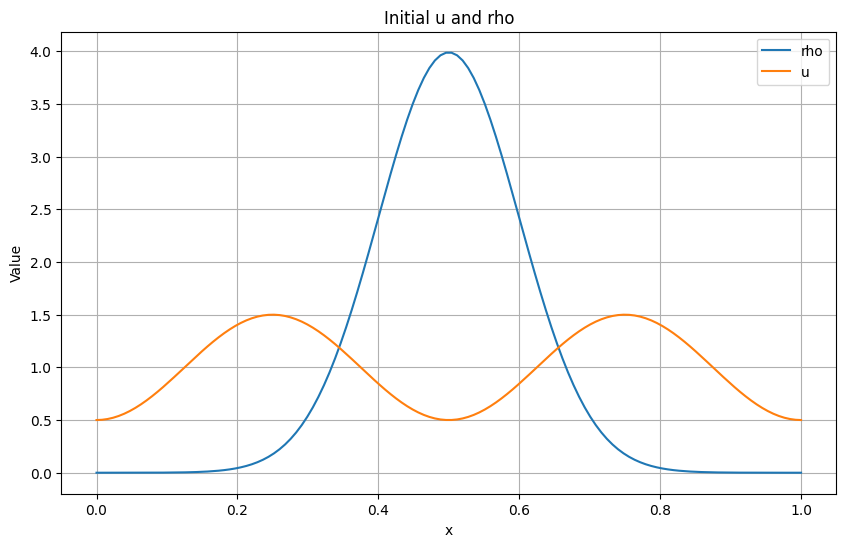

In [2]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(x_values, rho_initial, label='rho')
plt.plot(x_values, u_initial, label='u')

# Customize the plot
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Initial u and rho')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [3]:
# prompt: create a function that outputs an array that contains first derivative finite difference coefficients using coefficients from findiff package and print its output for accuacy order 4

from findiff import coefficients


def first_derivative_coefficients(accuracy_order):
  """
  Calculates and returns an array of first derivative finite difference coefficients.

  Args:
    accuracy_order: The desired accuracy order of the finite difference coefficients.

  Returns:
    A NumPy array containing the coefficients.
  """
  coeffs = coefficients(deriv=1, acc=accuracy_order)
  return coeffs['center']['coefficients']

# Example usage:
order = 8
coefficients = first_derivative_coefficients(order)
print(f"First derivative coefficients for accuracy order {order}: {coefficients}")


First derivative coefficients for accuracy order 8: [ 3.57142857e-03 -3.80952381e-02  2.00000000e-01 -8.00000000e-01
 -4.84636298e-15  8.00000000e-01 -2.00000000e-01  3.80952381e-02
 -3.57142857e-03]


In [4]:
matrices = [np.identity(N) for i in range(len(coefficients))]
for i in range(len(matrices)):
  matrices[i] *= coefficients[i]*N
  matrices[i] = np.roll(matrices[i], i-int(order/2), axis=1)
findiff = np.sum(matrices, axis=0)


In [5]:
def advance_time(rho, u, dt):
  rho_next = rho - dt * findiff.dot(u*rho)
  return rho_next

In [6]:
t_total = 1

rho_next = rho_initial
dt = .1/(order*N)
steps = int(t_total/dt)
data = []
for i in range(steps):
  rho_next = advance_time(rho_next, u_initial, dt)
  if i%100 == 0:
    data.append(rho_next)

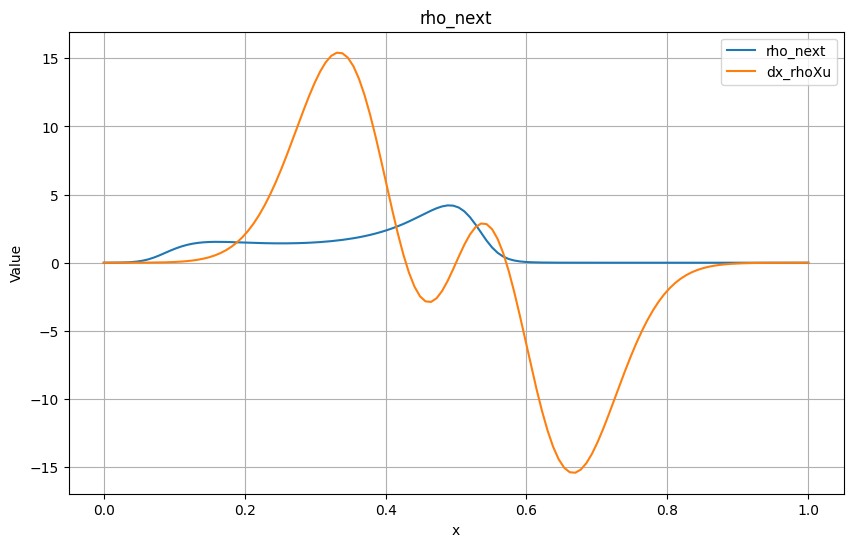

In [7]:
# Plot rho_next
plt.figure(figsize=(10, 6))
plt.plot(x_values, rho_next, label='rho_next')
plt.plot(x_values, findiff.dot(u_initial*rho_initial), label='dx_rhoXu')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('rho_next')
plt.legend()
plt.grid(True)
plt.show()


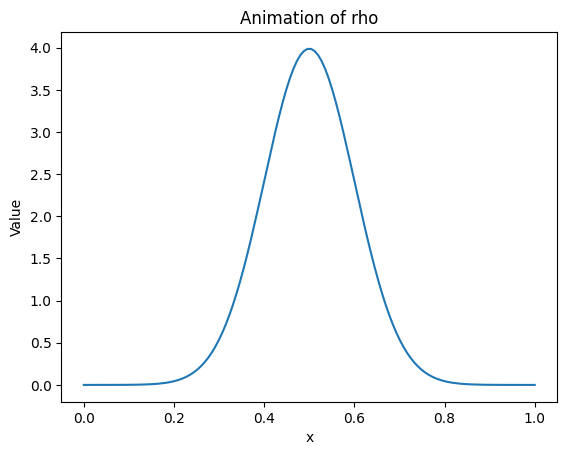

In [8]:
# prompt: animate data

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ... (Your existing code) ...

# Create the animation
fig, ax = plt.subplots()

x = x_values
line, = ax.plot(x, data[0])

def animate(i):
    line.set_ydata(data[i])  # Update the data
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(data), blit=True, interval=20, repeat=False)

plt.xlabel('x')
plt.ylabel('Value')
plt.title('Animation of rho')

plt.show()


In [9]:
from IPython.display import HTML
HTML(ani.to_html5_video())

In [10]:
from MPS_operations import *
mps_rho_initial = MPS(rho_initial.reshape((2,)*n))
mps_u_initial = MPS(u_initial.reshape((2,)*n))

In [11]:
chi_max = 2**int(n/2)

In [12]:
from mpos import diff_cores, kron_delta

mpo_findiff = diff_cores(1,0,n,1, delta_x=1/N)
kron = kron_delta(2)

In [13]:
def mps_advance_time(rho, u, dt):
  delta = multiply_MPS_MPS(kron, rho, u)
  #compress_MPS(delta, chi_max)
  delta = apply_MPO(mpo_findiff, delta)
  #compress_MPS(delta, chi_max)
  delta[0] = - dt * delta[0]
  rho_next = add_MPS_MPS(rho, delta)
  return compress_MPS(rho_next, chi_max)

In [14]:
rho_next = mps_rho_initial
mps_data = []
for i in range(steps):
  rho_next = mps_advance_time(rho_next, mps_u_initial, dt)
  if i%100 == 0:
    print(i*100/steps)
    mps_data.append(contract_MPS(rho_next).reshape((N)))

0.0
0.9765625
1.953125
2.9296875
3.90625
4.8828125
5.859375
6.8359375
7.8125
8.7890625
9.765625
10.7421875
11.71875
12.6953125
13.671875
14.6484375
15.625
16.6015625
17.578125
18.5546875
19.53125
20.5078125
21.484375
22.4609375
23.4375
24.4140625
25.390625
26.3671875
27.34375
28.3203125
29.296875
30.2734375
31.25
32.2265625
33.203125
34.1796875
35.15625
36.1328125
37.109375
38.0859375
39.0625
40.0390625
41.015625
41.9921875
42.96875
43.9453125
44.921875
45.8984375
46.875
47.8515625
48.828125
49.8046875
50.78125
51.7578125
52.734375
53.7109375
54.6875
55.6640625
56.640625
57.6171875
58.59375
59.5703125
60.546875
61.5234375
62.5
63.4765625
64.453125
65.4296875
66.40625
67.3828125
68.359375
69.3359375
70.3125
71.2890625
72.265625
73.2421875
74.21875
75.1953125
76.171875
77.1484375
78.125
79.1015625
80.078125
81.0546875
82.03125
83.0078125
83.984375
84.9609375
85.9375
86.9140625
87.890625
88.8671875
89.84375
90.8203125
91.796875
92.7734375
93.75
94.7265625
95.703125
96.6796875
97.65625
98.

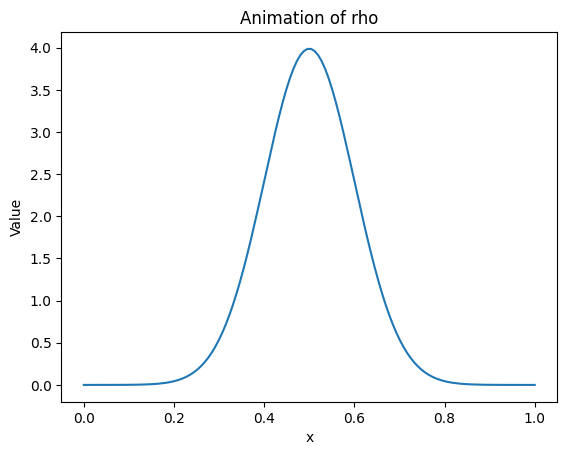

In [15]:
# ... (Your existing code) ...

# Create the animation
fig, ax = plt.subplots()

x = x_values
line, = ax.plot(x, data[0])

def animate(i):
    line.set_ydata(mps_data[i])  # Update the data
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(data), blit=True, interval=20, repeat=False)

plt.xlabel('x')
plt.ylabel('Value')
plt.title('Animation of rho')

plt.show()


In [16]:
from IPython.display import HTML
HTML(ani.to_html5_video())

In [17]:
import jax

jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from jax_ops import *
jax_kron = jnp.array(kron)
jax_u = list_to_jnp(mps_u_initial)
jax_findiff = list_to_jnp(mpo_findiff)

def mps_advance_time(rho, u, dt):
  delta = multiply_MPS_MPS(jax_kron, rho, u)
  #compress_MPS(delta, chi_max)
  delta = apply_MPO(jax_findiff, delta)
  #compress_MPS(delta, chi_max)
  delta[0] = - dt * delta[0]
  rho_next = add_MPS_MPS(rho, delta)
  return compress_MPS(rho_next, chi_max)

jit_advance_time = jax.jit(mps_advance_time)

In [18]:
rho_next = list_to_jnp(mps_rho_initial)
mps_data = []
for i in range(steps):
  rho_next = jit_advance_time(rho_next, jax_u, dt)
  if i%100 == 0:
    print(i*100/steps)
    mps_data.append(contract_MPS(rho_next).reshape((N)))

0.0
0.9765625
1.953125
2.9296875
3.90625
4.8828125
5.859375
6.8359375
7.8125
8.7890625
9.765625
10.7421875
11.71875
12.6953125
13.671875
14.6484375
15.625
16.6015625
17.578125
18.5546875
19.53125
20.5078125
21.484375
22.4609375
23.4375
24.4140625
25.390625
26.3671875
27.34375
28.3203125
29.296875
30.2734375
31.25
32.2265625
33.203125
34.1796875
35.15625
36.1328125
37.109375
38.0859375
39.0625
40.0390625
41.015625
41.9921875
42.96875
43.9453125
44.921875
45.8984375
46.875
47.8515625
48.828125
49.8046875
50.78125
51.7578125
52.734375
53.7109375
54.6875
55.6640625
56.640625
57.6171875
58.59375
59.5703125
60.546875
61.5234375
62.5
63.4765625
64.453125
65.4296875
66.40625
67.3828125
68.359375
69.3359375
70.3125
71.2890625
72.265625
73.2421875
74.21875
75.1953125
76.171875
77.1484375
78.125
79.1015625
80.078125
81.0546875
82.03125
83.0078125
83.984375
84.9609375
85.9375
86.9140625
87.890625
88.8671875
89.84375
90.8203125
91.796875
92.7734375
93.75
94.7265625
95.703125
96.6796875
97.65625
98.

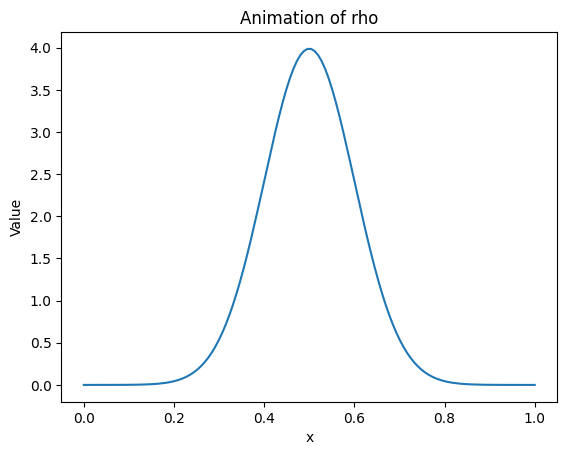

In [19]:
# ... (Your existing code) ...

# Create the animation
fig, ax = plt.subplots()

x = x_values
line, = ax.plot(x, data[0])

def animate(i):
    line.set_ydata(mps_data[i])  # Update the data
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(data), blit=True, interval=20, repeat=False)

plt.xlabel('x')
plt.ylabel('Value')
plt.title('Animation of rho')

plt.show()


In [20]:
from IPython.display import HTML
HTML(ani.to_html5_video())